<a href="https://colab.research.google.com/github/Rene-Capistran/UTRGV-Capstone-2025/blob/main/ML_AI_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# 1. Imports
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# 2. Feature Extraction Function
def extract_features(voltage, file_name, device, protocol):
    return {
        'File': file_name,
        'Device': device,
        'Protocol': protocol,
        'Mean': np.mean(voltage),
        'Standard_Deviation': np.std(voltage),
        'Variance': np.var(voltage),
        'Skewness': skew(voltage),
        'Kurtosis': kurtosis(voltage),
        'Energy': np.sum(voltage**2),
        'RMS': np.sqrt(np.mean(voltage**2)),
        'Maximum': np.max(voltage),
        'Minimum': np.min(voltage)
    }
# 3. File Mapping
file_map = {
    'ArduinoNano': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/Arduino_Nano_9600_dataset.csv'
        ]
    },
    'ArduinoUno': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/Arduino_UNO_9600_dataset.csv'
        ]
    },
    'ESP32': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/ESP_32_9600_dataset.csv'
        ]
    },
    'RaspberryPi5': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/RPi_5B_9600_dataset.csv',

        ]
    }
}

# 4. Process All Files
combined_features = []
for device, protocols in file_map.items():
    for protocol, files in protocols.items():
        batch_features = []
        for file in files:
            df = pd.read_csv(file, skiprows=1)
            voltage = df.iloc[:, 1].dropna().values
            features = extract_features(voltage, file, device, protocol)
            batch_features.append(features)
            combined_features.append(features)

        # Save per device-protocol
        pd.DataFrame(batch_features).to_csv(f'{device}_{protocol}_Features.csv', index=False)

# 5. Save Combined Dataset
pd.DataFrame(combined_features).to_csv('AllDevices_AllProtocols_Features.csv', index=False)

# 6. Preview
pd.DataFrame(combined_features)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # Also set max column width to display full cell content

# Display the DataFrame
print(pd.DataFrame(combined_features))


                                                                        File  \
0  /content/UTRGV-Capstone-2025/Data/Processed/Arduino_Nano_9600_dataset.csv   
1   /content/UTRGV-Capstone-2025/Data/Processed/Arduino_UNO_9600_dataset.csv   
2        /content/UTRGV-Capstone-2025/Data/Processed/ESP_32_9600_dataset.csv   
3        /content/UTRGV-Capstone-2025/Data/Processed/RPi_5B_9600_dataset.csv   

         Device Protocol      Mean  Standard_Deviation  Variance  \
0   ArduinoNano     UART  0.018790            0.008236  0.000068   
1    ArduinoUno     UART  0.020531            0.013379  0.000179   
2         ESP32     UART  0.015563            0.006130  0.000038   
3  RaspberryPi5     UART  0.021658            0.002977  0.000009   

       Skewness  Kurtosis    Energy       RMS   Maximum   Minimum  
0  2.843290e-16 -2.000000  0.000842  0.020515  0.027025  0.010554  
1  1.556989e-01 -0.819457  0.056450  0.024506  0.053909  0.000864  
2  1.030079e+00  1.550976  0.050919  0.016727  0.04068

In [174]:
pd.DataFrame(combined_features)

,File,Device,Protocol,Mean,Standard_Deviation,Variance,Skewness,Kurtosis,Energy,RMS,Maximum,Minimum
0,/content/UTRGV-Capstone-2025/Data/Processed/Arduino_Nano_9600_dataset.csv,ArduinoNano,UART,0.018790,0.008236,0.000068,2.843290e-16,-2.000000,0.000842,0.020515,0.027025,0.010554
1,/content/UTRGV-Capstone-2025/Data/Processed/Arduino_UNO_9600_dataset.csv,ArduinoUno,UART,0.020531,0.013379,0.000179,1.556989e-01,-0.819457,0.056450,0.024506,0.053909,0.000864
2,/content/UTRGV-Capstone-2025/Data/Processed/ESP_32_9600_dataset.csv,ESP32,UART,0.015563,0.006130,0.000038,1.030079e+00,1.550976,0.050919,0.016727,0.040689,0.005948
3,/content/UTRGV-Capstone-2025/Data/Processed/RPi_5B_9600_dataset.csv,RaspberryPi5,UART,0.021658,0.002977,0.000009,8.046797e-01,-0.340676,0.013382,0.021862,0.028877,0.017754


In [175]:
pd.DataFrame(batch_features).to_csv(f'{device}_{protocol}_Features.csv', index=False)
pd.DataFrame(combined_features).to_csv('AllDevices_AllProtocols_Features.csv', index=False)

In [176]:
df = pd.read_csv('AllDevices_AllProtocols_Features.csv')

# Separate features and labels
X = df.drop(columns=['File', 'Device', 'Protocol'])
y = df['Device']  # or use Protocol if you want protocol classification

In [177]:
print(df.columns)

Index(['File', 'Device', 'Protocol', 'Mean', 'Standard_Deviation', 'Variance',
       'Skewness', 'Kurtosis', 'Energy', 'RMS', 'Maximum', 'Minimum'],
      dtype='object')


In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [180]:
print("Train set distribution:\n", y_train.value_counts())
print("Validation set distribution:\n", y_val.value_counts())

Train set distribution:
 Device
RaspberryPi5    1
ArduinoNano     1
ESP32           1
Name: count, dtype: int64
Validation set distribution:
 Device
ArduinoUno    1
Name: count, dtype: int64


In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)
print("Test accuracy:", clf.score(X_test, y_test))

Test accuracy: 0.0


In [182]:
print(y_val.value_counts())

Device
ArduinoUno    1
Name: count, dtype: int64


In [183]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
iso.fit(X_train)

# Predict anomalies
anomaly_scores = iso.decision_function(X_val)
anomalies = iso.predict(X_val)  # -1 = anomaly, 1 = normal

In [184]:
print("y_val classes:", sorted(set(y_val)))
print("y_pred classes:", sorted(set(y_pred)))

y_val classes: ['ArduinoUno']
y_pred classes: ['ArduinoNano', 'ArduinoUNO', 'ESP32', 'RaspberryPi5']


In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ✅ Use only numeric features
X_proto = df.select_dtypes(include='number')
y_proto = df['Protocol']

# ✅ Train-test split
Xp_train, Xp_val, yp_train, yp_val = train_test_split(X_proto, y_proto, test_size=0.2, stratify=y_proto, random_state=42)

# ✅ Train and evaluate
proto_clf = RandomForestClassifier(random_state=42)
proto_clf.fit(Xp_train, yp_train)
yp_pred = proto_clf.predict(Xp_val)

print("🔌 Protocol Classification Report")
print(classification_report(yp_val, yp_pred, zero_division=0))

🔌 Protocol Classification Report
              precision    recall  f1-score   support

        UART       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [186]:
# 🎯 Detect anomalous signals (e.g., spoofed or rogue devices)
from sklearn.ensemble import IsolationForest

# ✅ Use only numeric waveform features
X_anomaly = df.select_dtypes(include='number')

# ✅ Train Isolation Forest on normal data
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_anomaly)

# ✅ Predict anomalies: -1 = anomaly, 1 = normal
anomaly_labels = iso_forest.predict(X_anomaly)
df['Anomaly'] = anomaly_labels

# ✅ Summary
print("🕵️ Threat Detection Summary")
print(df['Anomaly'].value_counts())  # Shows how many anomalies were detected

🕵️ Threat Detection Summary
Anomaly
 1    3
-1    1
Name: count, dtype: int64


In [187]:
# 🎯 Validate if predicted brand and protocol are consistent
# Define known valid combinations
valid_pairs = {
    ('ArduinoUNO', 'UART'),
    ('ArduinoNano', 'UART'),
    ('ESP32', 'UART'),
    ('RaspberryPi5', 'UART')
    # Add I2C/SPI combos as needed
}

# Apply rule-based check
def check_consistency(row):
    return 'Valid' if (row['Device'], row['Protocol']) in valid_pairs else 'Suspicious'

df['Consistency'] = df.apply(check_consistency, axis=1)

# Summary
print("🔍 Brand-Protocol Consistency Check")
print(df['Consistency'].value_counts())

🔍 Brand-Protocol Consistency Check
Consistency
Valid         3
Suspicious    1
Name: count, dtype: int64


Distribution of 'Device' classes:
Device
ArduinoNano     1
ArduinoUno      1
ESP32           1
RaspberryPi5    1
Name: count, dtype: int64


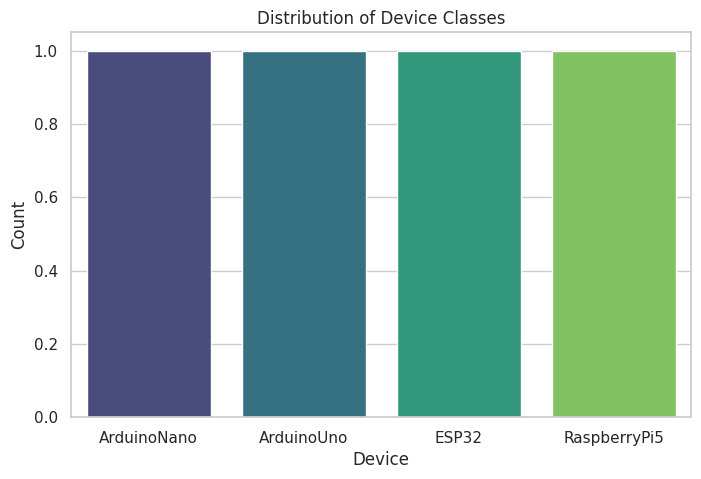

In [190]:
print("Distribution of 'Device' classes:")
print(df['Device'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Device', data=df, hue='Device', palette='viridis', legend=False)
plt.title('Distribution of Device Classes')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

In [199]:
# For each device file, split into chunks and compute features
window_size = 1000  # samples per segment
features = []
for device, protocols in file_map.items():
    for protocol, files in protocols.items():
        for file in files:
            df = pd.read_csv(file, skiprows=1)
            voltage = df.iloc[:, 1].dropna().values
            for i in range(0, len(voltage), window_size):
                segment = voltage[i:i+window_size]
                if len(segment) == window_size:
                    features.append({
                        'Device': device,
                        'Protocol': protocol,
                        'Mean': np.mean(segment),
                        'Std': np.std(segment),
                        'Variance': np.var(segment),
                        'Skewness': skew(segment),
                        'Kurtosis': kurtosis(segment),
                        'Energy': np.sum(segment**2),
                        'RMS': np.sqrt(np.mean(segment**2)),
                        'Max': np.max(segment),
                        'Min': np.min(segment)
                    })
df = pd.DataFrame(features)


In [200]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import glob

# ✅ Step 1: Load all device CSVs
path = "/content/UTRGV-Capstone-2025/Data/Processed/"
files = [
    "Arduino_Nano_9600_dataset.csv",
    "Arduino_UNO_9600_dataset.csv",
    "ESP_32_9600_dataset.csv",
    "RPi_5B_9600_dataset.csv"
]

dfs = []
for file in files:
    device_name = file.split("_")[1]  # Extract device name (Nano, UNO, ESP, RPi)
    df_temp = pd.read_csv(path + file)
    df_temp['Device'] = device_name  # Add device label
    dfs.append(df_temp)

# ✅ Combine all rows into one DataFrame
df = pd.concat(dfs, ignore_index=True)
print("Shape after combining:", df.shape)
print(df['Device'].value_counts())

# ✅ Step 2: Prepare features and labels
X = df.select_dtypes(include='number')  # All numeric columns
y = df['Device']  # Target labels

# ✅ Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 4: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ✅ Step 5: Train-test split
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# ✅ Step 6: Define models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=min(5, len(X_train))),
    "LogisticRegression": LogisticRegression(solver='saga', max_iter=5000),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

# ✅ Step 7: Train and evaluate
results = []
for name, model in models.items():
    print(f"\n🔍 Evaluating {name}...")
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_val)
    y_pred_decoded = le.inverse_transform(y_pred)
    y_val_decoded = le.inverse_transform(y_val_encoded)

    report = classification_report(y_val_decoded, y_pred_decoded, zero_division=0)
    score = classification_report(y_val_decoded, y_pred_decoded, output_dict=True, zero_division=0)

    print(report)
    results.append((name, score['accuracy']))

# ✅ Step 8: Summary
print("\n📊 Model Accuracy Summary:")
for name, acc in results:
    print(f"{name}: {acc:.2f}")


Shape after combining: (310, 24)
Device
32      183
UNO      95
5B       29
Nano      3
Name: count, dtype: int64

🔍 Evaluating RandomForest...
              precision    recall  f1-score   support

          32       0.97      0.97      0.97        36
          5B       0.83      0.83      0.83         6
        Nano       1.00      1.00      1.00         1
         UNO       1.00      1.00      1.00        19

    accuracy                           0.97        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.97      0.97      0.97        62


🔍 Evaluating SVM...
              precision    recall  f1-score   support

          32       0.90      1.00      0.95        36
          5B       1.00      0.33      0.50         6
        Nano       0.00      0.00      0.00         1
         UNO       0.95      1.00      0.97        19

    accuracy                           0.92        62
   macro avg       0.71      0.58      0.61        62
weighted avg       0

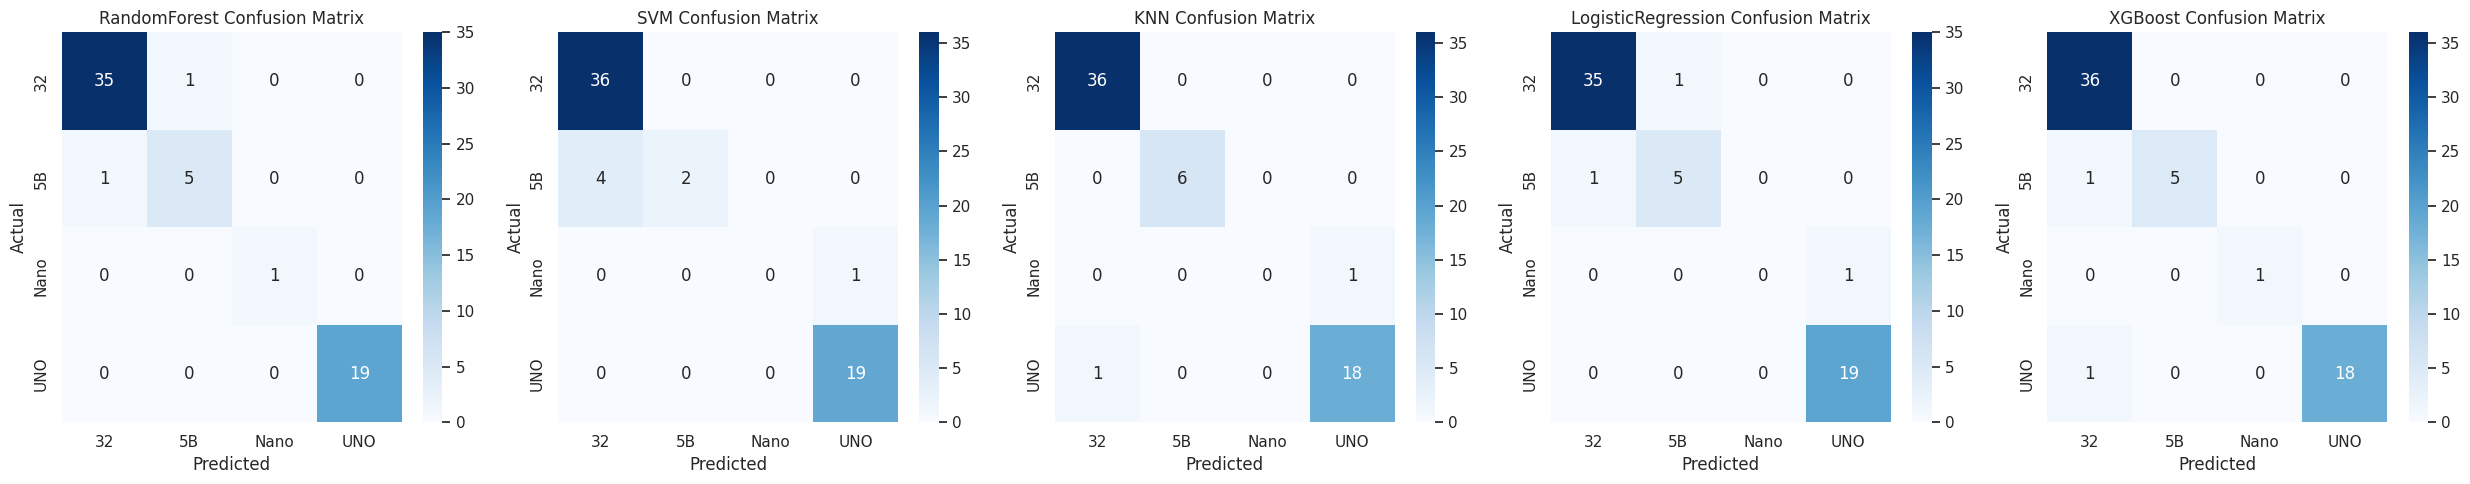

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ After training and evaluation loop
labels = le.classes_  # Device names from LabelEncoder
fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 5))

for ax, (name, model) in zip(axes, models.items()):
    # Predict again for confusion matrix
    y_pred = model.predict(X_val)
    y_pred_decoded = le.inverse_transform(y_pred)
    y_val_decoded = le.inverse_transform(y_val_encoded)

    # Compute confusion matrix
    cm = confusion_matrix(y_val_decoded, y_pred_decoded, labels=labels)

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [202]:
sns.heatmap(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],
            annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=ax)

<Axes: title={'center': 'XGBoost Confusion Matrix'}>

In [204]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train_encoded)
print(grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'max_depth': 10, 'n_estimators': 200}


In [3]:
from sklearn.metrics import roc_curve, auc
# Compute ROC for one-vs-rest if multi-class

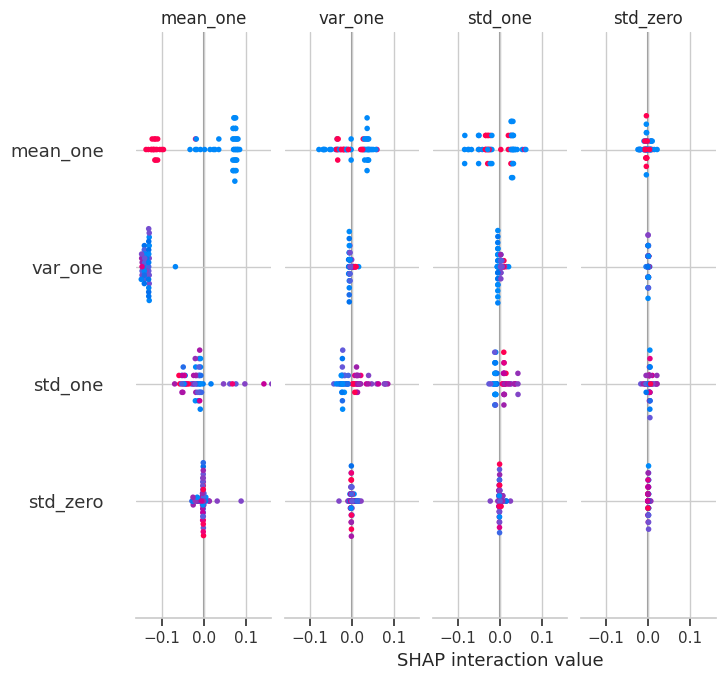

In [210]:
import shap
explainer = shap.TreeExplainer(models['RandomForest'])
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, feature_names=X.columns)

In [2]:

import pandas as pd
import time

df = pd.read_csv('/content/UTRGV-Capstone-2025/Data/Processed/Arduino_Nano_9600_dataset.csv')
for i in range(0, len(df), 100):  # simulate streaming
    chunk = df.iloc[i:i+100, 1].values  # waveform column
    # Extract features, scale, predict
    print(f"Processing chunk {i}...")
    time.sleep(0.5)  # simulate delay


Processing chunk 0...
